In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [2]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,286.969727,289.737678,285.977068,288.172340,1963682
1,2010-01-05,287.046143,289.985903,285.022679,288.248779,2014488
2,2010-01-06,280.555786,287.179796,279.849490,287.046156,3349176
3,2010-01-07,272.748291,282.292954,271.450208,280.803977,6474892
4,2010-01-08,267.174194,274.313607,265.914304,273.359140,6048178


In [4]:
cols_to_drop = [col for col in ['Date', 'Adj Close'] if col in df.columns]
df = df.drop(cols_to_drop, axis=1)

C:\Users\AarushiGarg\AppData\Local\Temp\ipykernel_13316\3459761350.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(cols_to_drop, axis=1)


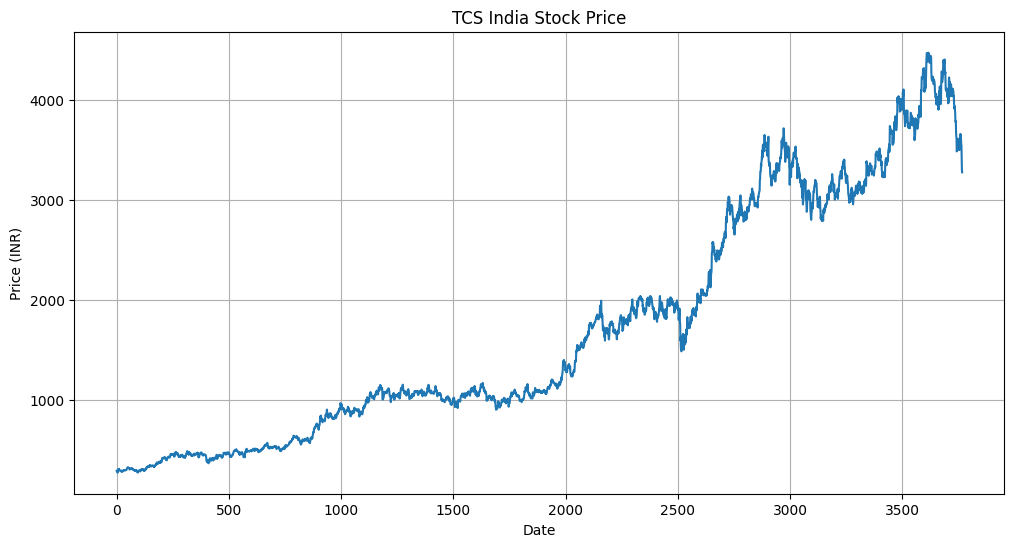

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [6]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,286.969727,289.737678,285.977068,288.172340,1963682
1,287.046143,289.985903,285.022679,288.248779,2014488
2,280.555786,287.179796,279.849490,287.046156,3349176
3,272.748291,282.292954,271.450208,280.803977,6474892
4,267.174194,274.313607,265.914304,273.359140,6048178
...,...,...,...,...,...
3762,3550.800049,3584.000000,3525.000000,3572.699951,2618493
3763,3543.949951,3564.100098,3530.050049,3544.000000,1764313
3764,3403.149902,3502.000000,3396.149902,3491.000000,4537821


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3762,3984.324355
3763,3979.016897
3764,3972.190703
3765,3964.365398


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

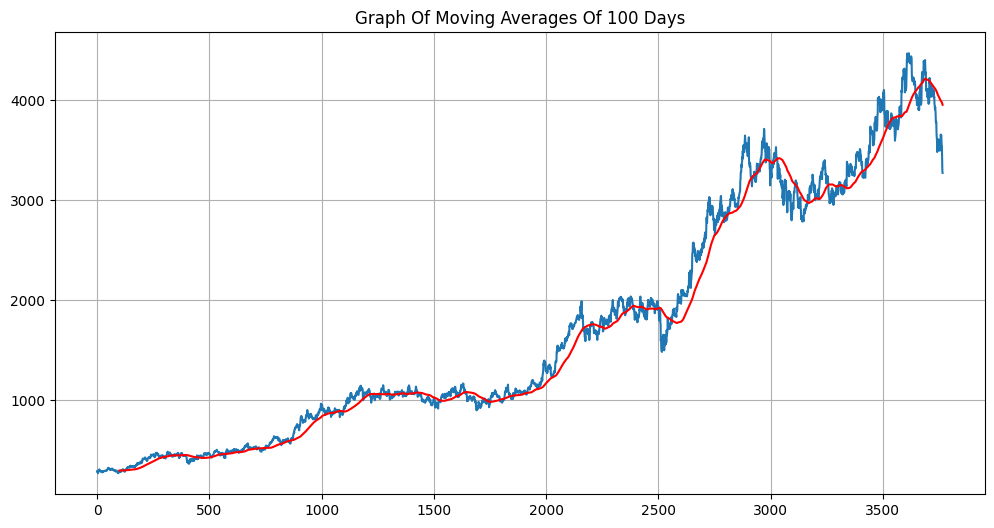

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3762,4059.861656
3763,4058.585481
3764,4056.831111
3765,4054.641016


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

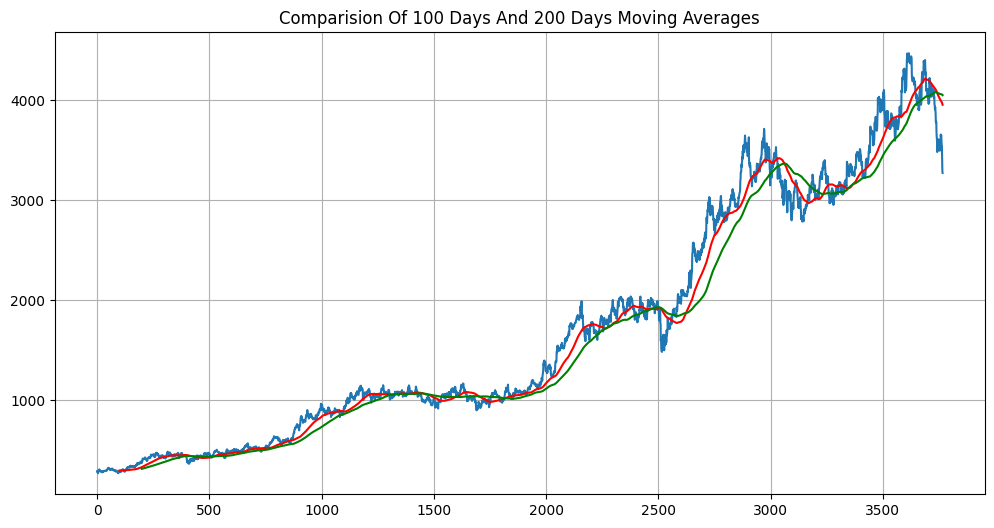

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(3767, 5)

In [12]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2636, 6)
(1131, 6)


In [13]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,286.969727,289.737678,285.977068,288.172340,1963682
1,2010-01-05,287.046143,289.985903,285.022679,288.248779,2014488
2,2010-01-06,280.555786,287.179796,279.849490,287.046156,3349176
3,2010-01-07,272.748291,282.292954,271.450208,280.803977,6474892
4,2010-01-08,267.174194,274.313607,265.914304,273.359140,6048178


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [16]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01043957],
       [0.01048072],
       [0.00983338],
       ...,
       [1.        ],
       [0.99463432],
       [0.99953444]])

In [17]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [18]:
x_train.shape

(2536, 100, 1)

In [19]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120))  # Final LSTM layer
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [24]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 [==============================] - 40s 122ms/step - loss: 0.0222 - mean_absolute_error: 0.0918
Epoch 2/100
80/80 [==============================] - 10s 121ms/step - loss: 0.0049 - mean_absolute_error: 0.0476
Epoch 3/100
80/80 [==============================] - 10s 121ms/step - loss: 0.0045 - mean_absolute_error: 0.0460
Epoch 4/100
80/80 [==============================] - 10s 121ms/step - loss: 0.0046 - mean_absolute_error: 0.0459
Epoch 5/100
80/80 [==============================] - 10s 121ms/step - loss: 0.0041 - mean_absolute_error: 0.0439
Epoch 6/100
80/80 [==============================] - 10s 123ms/step - loss: 0.0036 - mean_absolute_error: 0.0413
Epoch 7/100
80/80 [==============================] - 10s 123ms/step - loss: 0.0043 - mean_absolute_error: 0.0456
Epoch 8/100
80/80 [==============================] - 10s 119ms/step - loss: 0.0037 - mean_absolute_error: 0.0410
Epoch 9/100
80/80 [==============================] - 10s 121ms/step - loss: 0.0031 - mean_absolu

In [25]:
model.save('keras_model.h5')

In [26]:
test_close.shape

(1131, 1)

In [27]:
past_100_days = pd.DataFrame(train_close[-100:])

In [28]:
test_df = pd.DataFrame(test_close)

In [30]:
import pandas as pd

final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [31]:
final_df.head()

,0
0,1573.738520
1,1612.093785
2,1667.067840
3,1659.460297
4,1689.075585


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01313762],
       [0.03196759],
       ...,
       [0.65670916],
       [0.61272904],
       [0.52278206]])

In [33]:
input_data.shape

(1231, 1)

In [34]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1131, 100, 1)
(1131,)


In [36]:
y_pred = model.predict(x_test)

36/36 [==============================] - 5s 50ms/step


In [37]:
y_pred.shape

(1131, 1)

In [38]:
y_test

array([0.18780259, 0.20437605, 0.23783473, ..., 0.65670916, 0.61272904,
       0.52278206])

In [39]:
y_pred

array([[0.19304585],
       [0.1953256 ],
       [0.19838622],
       ...,
       [0.6942344 ],
       [0.68037856],
       [0.6594479 ]], dtype=float32)

In [40]:
scaler.scale_

array([0.00034252])

In [41]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

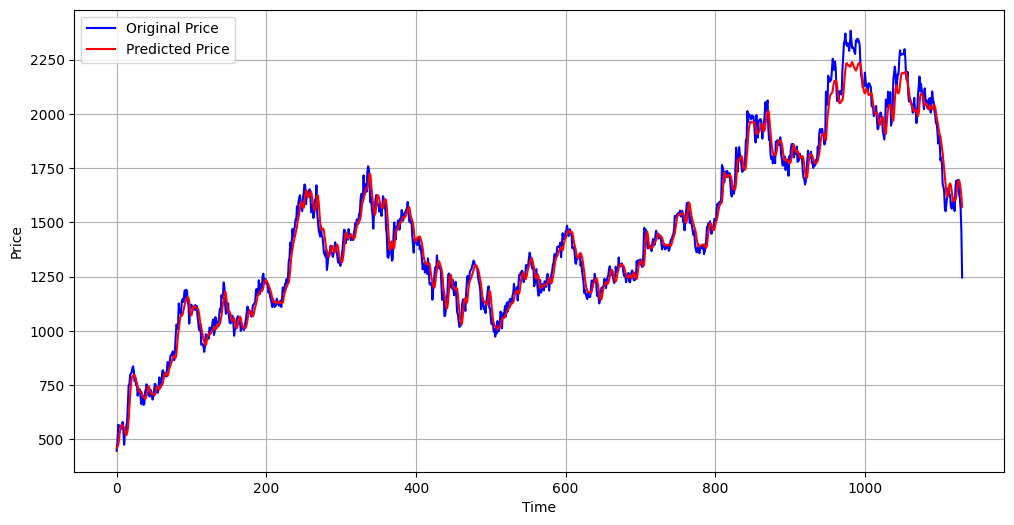

In [42]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 2.84%


In [44]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9809559220715799


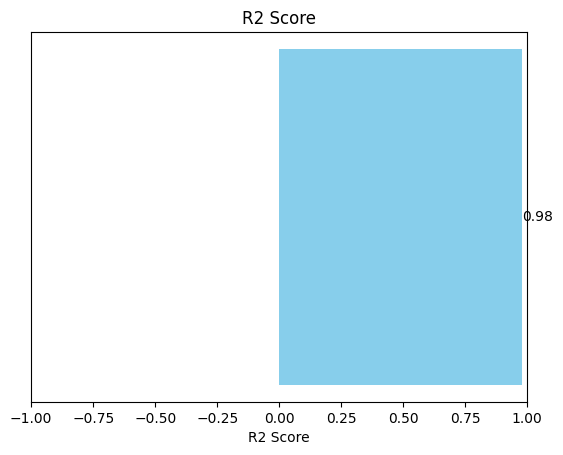

In [45]:
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

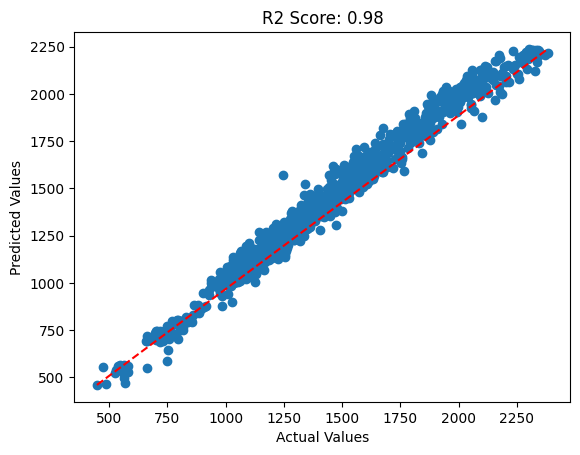

In [46]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()